# (0) Before we get started

**You need a Google account to edit and run code here.**

1.   Sign into your Google account and open this ipynb again.
2.   From the menu, choose *Save a copy in Drive*, open that one and close this one.
3.   Download https://github.com/machinelistening/machinelistening.github.io/blob/master/Piano1-1.wav
4.   On the left side here, click the folder icon, then upload *Piano1-1.wav* (root/content/Piano1-1.wav).

**OR if you don't have/want that, execute the .ipynb locally:**

1.   Download the .ipynb and *Piano1-1.wav* from the course github.
2.   Install miniconda (https://docs.conda.io/en/latest/miniconda.html)
3.   Open a terminal/Anaconda prompt
4.   "conda create -n [name] python=3.7"
5.   "conda activate [name]"
6.   "pip install {numpy, matplotlib, librosa, ipython, jupyter}"
7.   "jupyter notebook Machine_Listening_Seminar_1_Solutions.ipynb"
8.   A browser tab should open with URL "http://localhost:8888/notebooks/Machine_Listening_Seminar_1_Solutions.ipynb" and you should see the document.


---
# (1) Hello world
Welcome to your first MIR seminar! Topics today:

*   Python basics and library usage
*   How to create a sine wave
*   Disassemble the sine wave into its STFT-spectrum, Mel-spectrum and chromagram
*   See the spectral differences between a sine wave and piano chords

Let's get started with some elemental Python basics!

In [ ]:
part1 = 'Hello,'
part2 = 'AST world!'
print('{} {}'.format(part1, part2))  # FILL IN: Concatenate the two strings and insert a space
print(part1 + part2)

print('\nLet\'s do a headcount!')
for i in range(1, 11):  # FILL IN: Start and end of the loop. Start at 1, end at 10!
  print(i)
print('Great, everyone is here.')

Hello, AST world!
Hello,AST world!

Let's do a headcount!
1
2
3
4
5
6
7
8
9
10
Great, everyone is here.


Expected outputs:
*   'Hello, AST world!'
*   1, 2, 3, 4, 5, 6, 7, 8, 9, 10 (ommitted line breaks here)

---
# (2) Python & numpy basics

*   A quick look at some functionalities of the Python *numpy* package
*   importing Python libraries


In [ ]:
import numpy as np

a = np.array([1, 2])              # vector/"1D-array" with values 1 and 2
b = np.array([3, 4])              # same, values 3 and 4
ab1 = np.vstack((a, b))           # stacks them into a matrix
ab2 = np.array([[1, 2], [3, 4]])  # same as ab1
c = np.ones((2, 3)) * 1           # 2D-array with 2 rows and 3 columns, filled with ones.
d = np.log(ab2)                   # natural logarithm

e = [1, 2, 3, 4, 5]               # a list (not numpy)
f = list(np.arange(3, 8))         # [3, 4, 5, 6, 7]
g = np.sum(e)                     # sum of the elements in e
h = np.sum((e, f))                # sum of the elements in both e and f
i = np.sum(ab1, axis=0)           # sum per column of the matrix
ef = set(e).intersection(set(f))  # intersection of e and f

m = e[0]                          # first element of e
n = e[1:3]                        # indices 2 and 3 of e
o = e[-1]                         # last element of e
p = len(e)                        # number of elements in e
q = [1, 2, [3, 4], 5]             # nested lists --> length of q?

print('a: {}'.format(a))
print('b: {}'.format(b))
print('ab1:\n {}'.format(ab1))
print('c:\n {}'.format(c))
print('d:\n {}'.format(d))
print('g: {}'.format(g))
print('h: {}'.format(h))
print('i: {}'.format(i))
print('ef: {}'.format(ef))
print('m: {}, n: {}, o: {}'.format(m, n, o))
print('p: {}, len(q): {}'.format(p, len(q)))

---
# (3) Sine wave
Next, we create a sine wave, which helps us get introduced to more Python concepts. Topics:

*   formula for a sine wave
*   get to know *matplotlib* for plotting graphs

**Your task:**
Create a 1-second sinusoid with an amplitude of 3, a frequency of the note E3 (164,81 Hz) at a sample rate (fs) of 22050 Hz. Then sample the first 500 elements for the plot.

[0.   0.14 0.28 0.42 0.56 0.7  0.83 0.97 1.1  1.23]


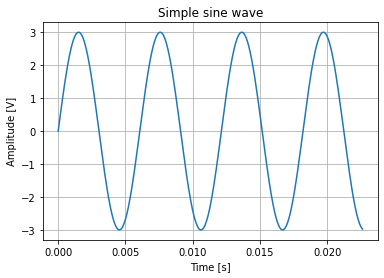

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd


### START CODING HERE ###
amp = 3
freq = 164.81
fs = 22050

t = np.arange(0, 1*fs) / fs                  # Sets up time samples. Other options: t = np.arange(0, 2205, 0.0001), OR t = np.linspace(0, 1, fs)
pha = 0

sine_wave = amp*np.sin(2*np.pi*freq*t)       # Formula for sine wave. Use np where applicable. A * sin(2*Pi*f*t)
print(np.round(sine_wave[:10], decimals=2))  # FILL IN: Print the first 10 samples of your sine wave.

fig, ax = plt.subplots()
ax.plot(t[:500], sine_wave[:500])            # FILL IN: Plot the first 500 samples of your sine wave. Takes parameters time and data.
ax.set(xlabel='Time [s]', ylabel='Amplitude [V]', title='Simple sine wave')  # FILL IN: Axis labels
ax.grid()
plt.show()
### END CODING HERE ###


ipd.Audio(sine_wave, rate=fs)

expected output: [0.   0.14 0.28 0.42 0.56 0.7  0.83 0.97 1.1  1.23]

# (4) Path operations with os library

*   *os* library (https://docs.python.org/3/library/os.html)
*   Path operations useful for datasets, file checks, sytem operations
*   Playground for parameters

In [ ]:
import os 

current_os = os.name 
current_path = os.getcwd()                        # get the current working directory
                                                  # 'nt' for windows, 'posix' for linux, among others
print("Current operating system: " + current_os)  # get current operating system
print("Current path: " + current_path)

new_folder = "data"                               # create a new sub directory
abs_path = os.path.join(current_path, new_folder) # concetenate path names
head, tail = os.path.split(abs_path)              # Split absolute path
base_name = os.path.basename(abs_path)
print("Absolute path: " + abs_path)
print("head: " + head)
print("tail: " + tail)
print("basename: " + base_name)

os.mkdir(abs_path)                                # create a new folder

In [ ]:
os.chdir(new_folder)                              # enter folder

for i in range(4):                                # create 5 text files in the folder
  filename = "example_" + str(i) + ".txt"
  new_file = open(filename, 'w')
  new_file.close()

os.chdir("..")                                    # change back to parent directory

example_file = os.path.join(abs_path, "example_0.txt")

path_exists =  os.path.exists(abs_path)           # check if path exists
is_file = os.path.isfile(example_file)            # check if path is a file
is_dir = os.path.isdir(abs_path)                  # check if path is a directory

print("\n")
print("Does the path exist?: " + str(path_exists))
print("Is the path a file?: " + str(is_file))
print("Is the path a directory?: " + str(is_dir))

In [ ]:
os.remove(example_file)

path_exists =  os.path.exists(abs_path)           # check if path exists
is_file = os.path.isfile(example_file)            # check if path is a file
is_dir = os.path.isdir(abs_path)                  # check if path is a directory

print("\n")
print("Does the path exist?: " + str(path_exists))
print("Is the path a file?: " + str(is_file))
print("Is the path a directory?: " + str(is_dir))

In [ ]:
# walk through folder structure and remove content
for root, dirs, files in os.walk(abs_path, topdown=False):
  for name in files:
    print ("Removing: " + os.path.join(root, name))
    os.remove(os.path.join(root, name))
  for name in dirs:
      os.rmdir(os.path.join(root, name))
      print ("Removing: " + os.path.join(root, name))

os.rmdir(abs_path)

path_exists =  os.path.exists(abs_path)           # check if path exists
is_file = os.path.isfile(example_file)            # check if path is a file
is_dir = os.path.isdir(abs_path)                  # check if path is a directory

print("\n")
print("Does the path exist?: " + str(path_exists))
print("Is the path a file?: " + str(is_file))
print("Is the path a directory?: " + str(is_dir))

In [ ]:
# Create 2 subfolders "speech" and "music" with 3 .txt files inside named 
# speech_file_00x.txt or music_file_00x.txt respectivly. (replace '00x' with 
# the actual file number)

import os

### Start code here
current_path = os.getcwd()

new_folder1 = "speech"
new_folder2 = "music"

abs_path1 = os.path.join(current_path, new_folder1) 
abs_path2 = os.path.join(current_path,new_folder2)

os.mkdir(abs_path1)
os.mkdir(abs_path2)

os.chdir(new_folder1)

for i in range(3):
  filename = new_folder1 + '_file_00' + str(i) + '.txt' 
  new_file = open(filename, 'w')
  new_file.close()

os.chdir('..') 
os.chdir(new_folder2)

for i in range(3):
  filename = new_folder2 + '_file_00' + str(i) +'.txt'
  new_file = open(filename,'w')
  new_file.close()

os.chdir('..') 
### End code here